### 4.2 Missing data: impact on base statistics & distribution analysis; methods to complete missing data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2
from IPython.display import display

from pydataset import data


In [16]:
#available datasets
data().head()

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students


#### 1. Data Source:
- The Task 4.2 data source is:
  1. (Example 1): A simple random sample of independent chi-squared (identically) distributed random variables
     - $X \equiv \chi^2(n), n = 3$
     - size: 100000
  2. (Example 2): 
     - pydataset (WWWusage) - Internet Usage per Minute
  3. (Example 3):
     - pydataset (nottem) - Average Monthly Temperatures at Nottingham, 1920-1939

In [3]:
n=3
data1=chi2.rvs(n,size=100000)
data2=data("WWWusage")
data3=data("nottem")

##### 2. Distribution analysis:

In [4]:
def distribution_hist(sample,title="",label="",figsize=(5,3)):
    plt.hist(sample,bins=80,density=True,label=label)
    plt.xlim((-1,15))
    plt.ylim((0,0.5))
    if label:
        plt.legend()
    plt.title(title)
    plt.gcf().set_size_inches(figsize)
    plt.show()

    print("mean =",sample.mean())
    print("var =",sample.std()**2)

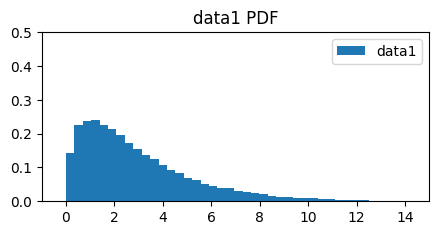

mean = 3.00967278597506
var = 6.094274767964979


In [5]:
distribution_hist(data1,label="data1",title="data1 PDF",figsize=(5,2.2))

In [6]:
print("data2")
display(data2.info())
display("mean: "+str(data2['WWWusage'].mean()))
display("std: "+str(data2['WWWusage'].std()))

print("\n\ndata3")
display(data3.info())
display("mean: "+str(data3['nottem'].mean()))
display("std: "+str(data3['nottem'].std()))


data2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 100
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   time      100 non-null    int64
 1   WWWusage  100 non-null    int64
dtypes: int64(2)
memory usage: 2.3 KB


None

'mean: 137.08'

'std: 39.9994141371237'



data3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 1 to 240
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    240 non-null    float64
 1   nottem  240 non-null    float64
dtypes: float64(2)
memory usage: 5.6 KB


None

'mean: 49.03958333333333'

'std: 8.57232434031383'

In [7]:
col2="WWWusage"
col3="nottem"

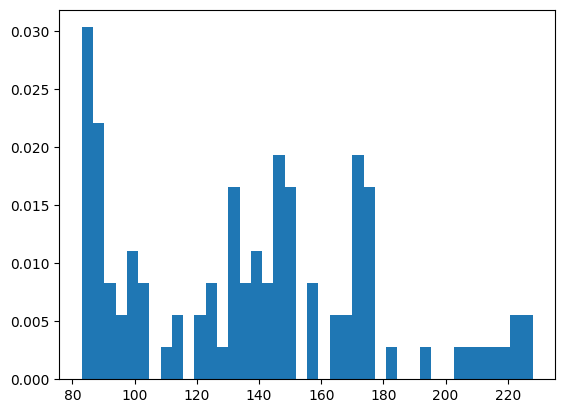

In [8]:
plt.hist(data2[col2],bins=40,density=True)
plt.show()

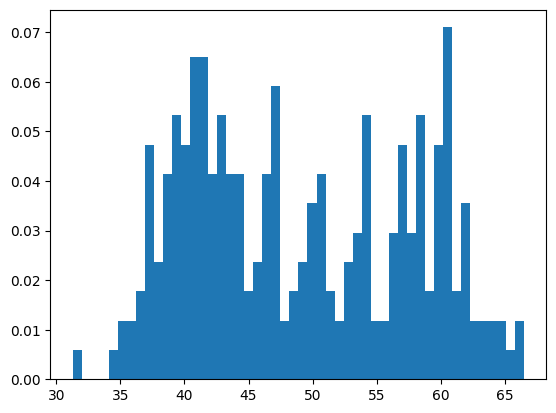

In [9]:
plt.hist(data3[col3],bins=50,density=True)
plt.show()

##### 2. Research purpose:
- Example 1:
    1. Show impact of missing data on base statistics (when the distribution of the data is known)
    2. Choose methods to complete missing data
    3. Perform distribution analysis on the initial dataset vs a dataset with missing data, that was filled; Compare the results
- Examples 2 & 3: (the distribution of the data is unknown)
    1. Choose different methods to complete the missing data 
        - The goal is to fill in the missing data without impacting the sample distribution
    2. Select a test for the equality of distributions, set a confidence level
        - K-S test / Anderson–Darling test, $\alpha=\small{0.05}$
    3. Fill in the data, display base statistics values (mean, variance, skewness, kurtosis etc)
    4. For each method (tests for the equality of distributions):
        - Use a test for the equality of distributions to check the impact of the method (used for filling the data that is missing) on the data distribution
        - If the results of chosen tests for the distribution are positive (both samples are identically distributed with the confidence level $\alpha$):
            - Conclude that the method is efficient and can be used for filling in the data in a chosen dataset
        - Otherwise: Conclude, that a different method should be used for the dataset
    5. Choose methods that fill the missing data with minimum impact on its distribution function (better p-value of the tests used in distribution analysis)
    6. Draw conlcusions


##### Example 1:  Model definition:
Model: $(X,\{P_{n}, n \in N\})$:
   - X = $[ 0, +\infty)$
   - $n = 3$; $N = \mathbb{N}$
   - $P_{n} \equiv \chi^2\space(n)$

##### Example 2:  Model definition:
Model: $(X,\{P_\theta, \theta \in \Theta\})$:
   - $\text{X: sample values}$
   - $\theta - ?, \Theta - ?$
   - $P_\theta: \text{empirical CDF of the sample}$

##### Example 2:  Model definition:
Model: $(X,\{P_\theta, \theta \in \Theta\})$:
   - $\text{X: sample values}$
   - $\theta - ?, \Theta - ?$
   - $P_\theta: \text{empirical CDF of the sample}$

In [10]:
n = 3

In [11]:
def corrupt_data(sample,fun):
    #fun = function of sample & element index
    return np.array([fun(sample,i) for i in range(len(sample))],dtype=float)

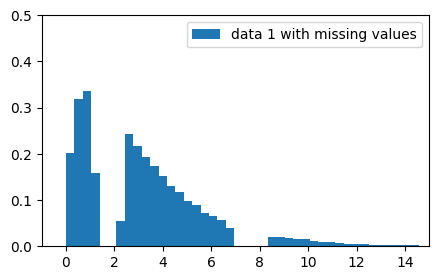

mean = 3.195537875642973
var = 6.800251383231948
null values count: 28998


In [14]:
from random import random
fun1=lambda sample,i: sample[i] if not len(sample)//4<i<len(sample)//2 else None
fun2=lambda sample,i: sample[i] if not len(sample)//25*23<i<len(sample)//25*24 else None
data1missing=corrupt_data(corrupt_data(sorted(data1),fun1),fun2)
null_count=sum(np.isnan(data1missing))
data1missing_nonnull=data1missing[~np.isnan(data1missing)]
distribution_hist(data1missing_nonnull,label="data 1 with missing values")
print("null values count:",null_count)

In [22]:


def mean_imputation(sample):
    sample=pd.Series(sample)
    return sample.fillna(sample.mean())

def interpolation(sample,method='linear',kw={}):
    sample=pd.Series(sample)
    return sample.interpolate(method=method, limit_direction='forward', axis=0,**kw)

def interpolation_linear(sample):
    return interpolation(sample,method='linear')

    

In [23]:
def find_missing_values(data:pd.Series,dtype=None,eps=1):
    d=data.sort_values()
    value_iter=None
    new_arr=[]
    
    for val in d:
        if val is None:
            continue
        if value_iter is None:
            value_iter=val
            new_arr.append(value_iter)
            continue
        if val-value_iter>eps:
            new_arr+=[None]*int((val/eps-value_iter/eps-eps))
        new_arr.append(val)
        value_iter=val
    return pd.Series(new_arr,dtype=dtype)

In [24]:
data2.head()

,time,WWWusage
1,1,88
2,2,84
3,3,85
4,4,85
5,5,84


In [26]:
#epsilon=1 because [nottem] values are int values with precision 1
data2missing=find_missing_values(data2[col2],eps=1)
data2missing

0       83.0
1       84.0
2       84.0
3       84.0
4       84.0
       ...  
184      NaN
185      NaN
186    226.0
187      NaN
188    228.0
Length: 189, dtype: float64

In [27]:
data3.head()

,time,nottem
1,1920.000000,40.6
2,1920.083333,40.8
3,1920.166667,44.4
4,1920.250000,46.7
5,1920.333333,54.1


In [29]:
#epsilon=0.1 because [nottem] values are float values with precision 0.1
data3missing=find_missing_values(data3[col3],eps=0.1)

In [31]:
from math import ceil
methods = [
    lambda data,args: interpolation_linear(data),
    lambda data,args: mean_imputation(data),
    lambda data,args: interpolation(data,method='polynomial',kw=args),
    lambda data,args: interpolation(data,method='quadratic'),
    lambda data,args: interpolation(data,method='spline',kw=args),
    lambda data,args: interpolation(data,method='piecewise_polynomial'),
    lambda data,args: interpolation(data,method='nearest'),
    lambda data,args: interpolation(data,method='akima'),
    lambda data,args: interpolation(data,method='pad')
]
sub_titles=[
    "linear interpolation",
    "mean inputation",
    "polynomial interpolation",
    "quadratic interpolation",
    "spline ",
    "piecewise_polynomial",
    "krogh",
    "akima",
    "pad"
]

def get_figures(size,figsize):
    fig,ax=plt.subplots(*size,figsize=figsize)
    return fig,ax,ax.reshape(1,size[0]*size[1])

def test_methods_for_data(data_mvals,title="",figsize=(5,3),fontsize=6,skip=None,additional_args=None):
    # data: pd.Series that contains missing (None) values
    global methods,sub_titles
    if skip is None:
        skip=dict()
    if additional_args is None: additional_args=dict()
    s=ceil(len(methods)**0.5)
    size=(s,s)
    fig,_ax,ax_vector=get_figures(size,figsize)
    plt.rc('font',size=fontsize)
    ax_vector=ax_vector[0]
    for i in range(len(methods)):
        if i+1 in skip:
            continue
        args=additional_args.get(i+1,dict())
        fill=methods[i]
        ttl=title+sub_titles[i]
        ax=ax_vector[i]
        plt.gcf()
        X=fill(data_mvals,args)
        ax.hist(X,bins=50)
        ax.set_xlabel("",fontsize=fontsize)
        ax.set_ylabel("",fontsize=fontsize)
        ax.set_title(ttl,fontsize=fontsize)

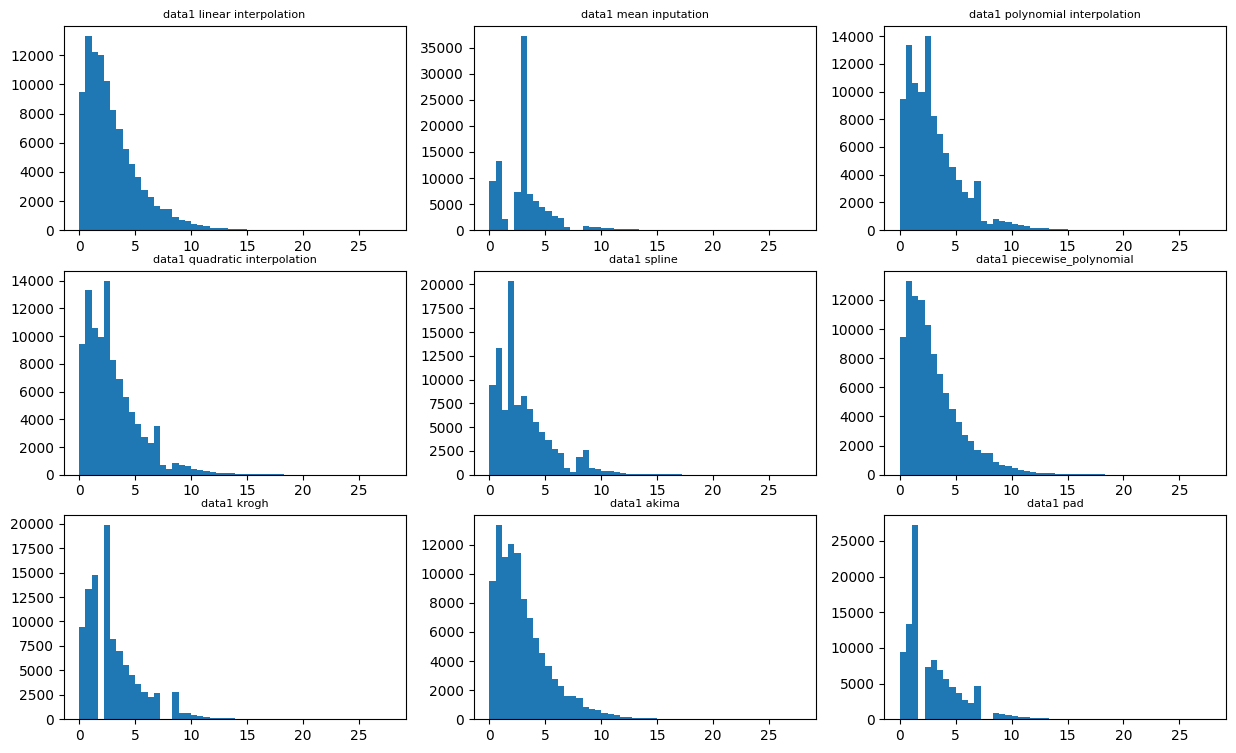

In [32]:
test_methods_for_data(data1missing,figsize=(15,9),title='data1 ',fontsize=8,additional_args={
    3:{'order':2},
    5:{'order':3}
})

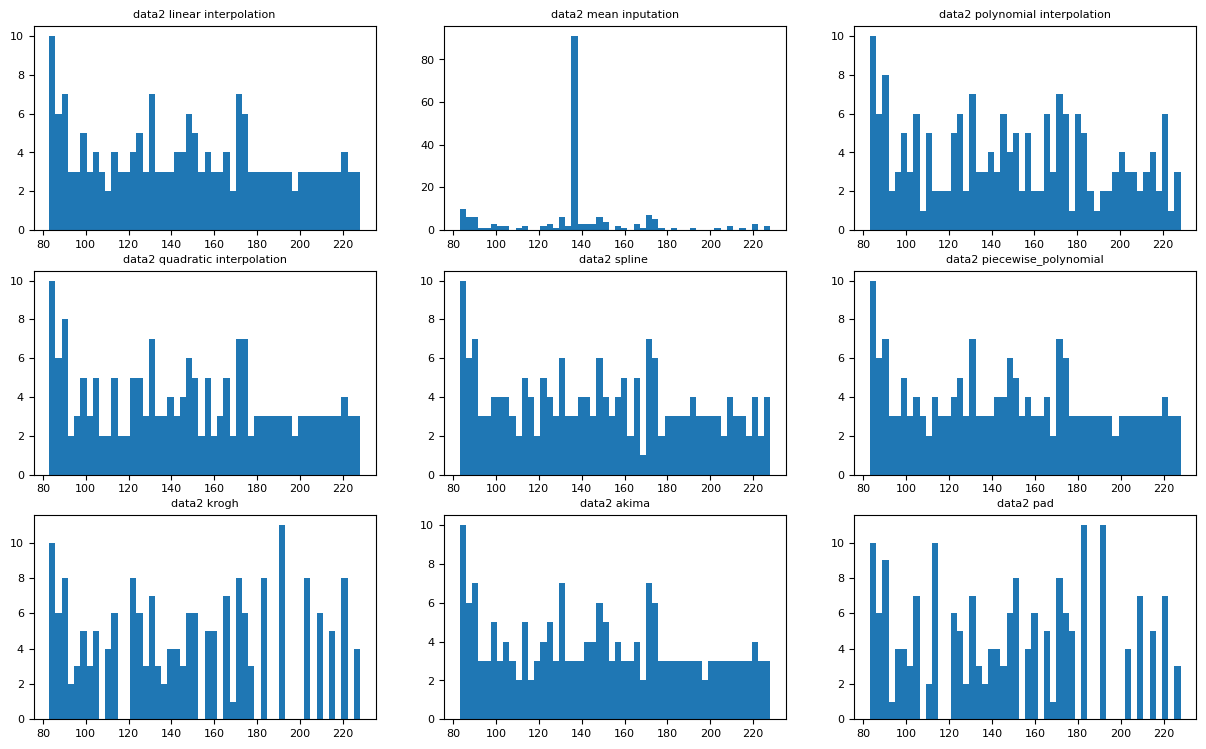

In [33]:
test_methods_for_data(data2missing,figsize=(15,9),title='data2 ',fontsize=8,additional_args={
    3:{'order':5},
    5:{'order':3}
})

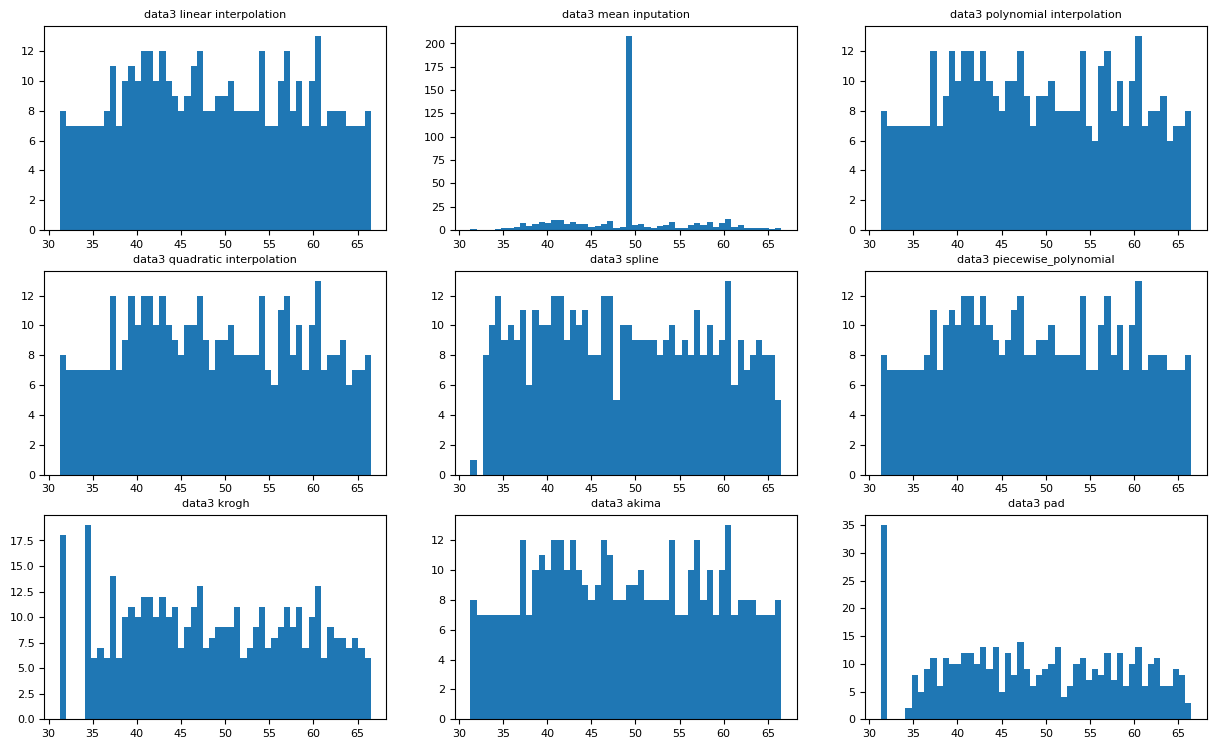

In [34]:
test_methods_for_data(data3missing,figsize=(15,9),title='data3 ',fontsize=8,additional_args={
    3:{'order':2},
    5:{'order':3}
})